# Axion-electron coupling limits vs axion mass

Axion mass-PQ scale relation:
\begin{equation}
m_{a}=5.70(7) \mu \mathrm{eV}\left(\frac{10^{12} \,\mathrm{GeV}}{f_{a}}\right)
\end{equation}

Axion-electron coupling
\begin{equation}
g_{ae} \equiv \frac{C_{ae} m_{e}}{f_{a}}=8.943 \times 10^{-11} C_{ae}\frac{m_a}{\mathrm{eV}}
\end{equation}

Model dependent constant:
\begin{equation}
C_{ae}  = 
\begin{cases}
  2\times 10^{-4} & {\rm KSVZ} \\
  [0.024,\frac{1}{3}] & {\rm DFSZ\,I} \\
  [-\frac{1}{3},0] & {\rm DFSZ\,II}
\end{cases}
\end{equation}
In DFSZ the lepton mass can come from either coupling to $H_u$ or $H_d$, so $C_{ae} = -C_{au}$ or $C_{ad}$. The range of values for DFSZ I and II come from the perturbativity of the Yukawa couplings with sets the range $0.28<v_{u} / v_{d}<140$ for the Higgs vevs.

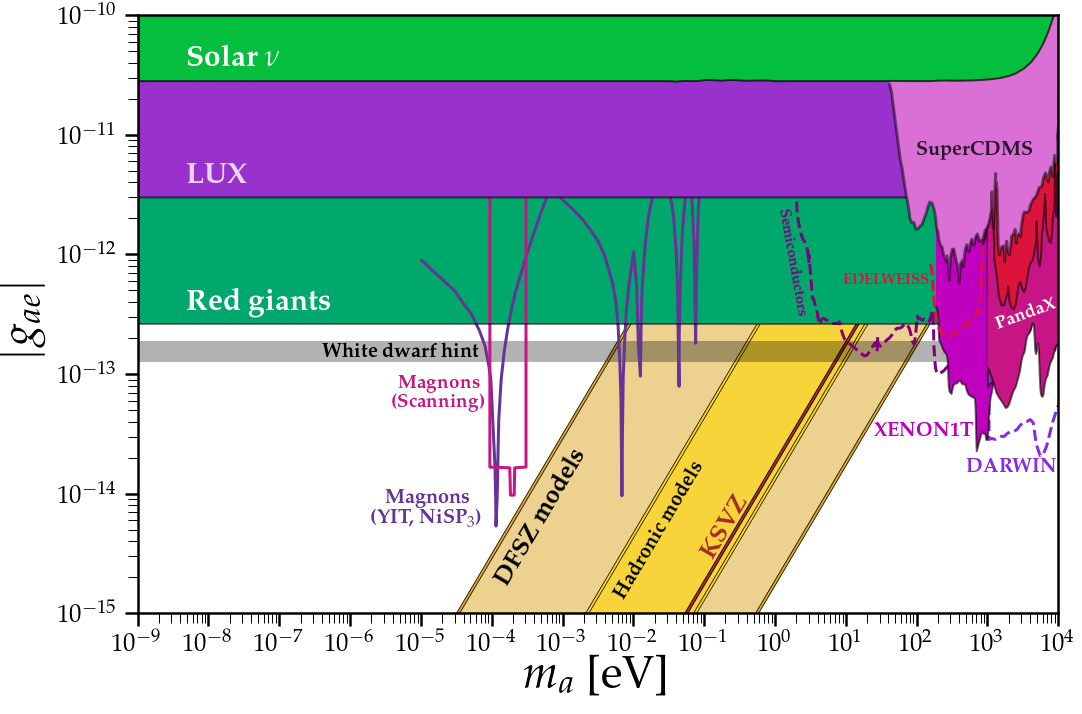

In [1]:
%matplotlib inline
from PlotFuncs import AxionElectron, MySaveFig

fig,ax = AxionElectron.FigSetup(Shape='Rectangular',mathpazo=True)
AxionElectron.QCDAxion(ax)
AxionElectron.UndergroundDetectors(ax,projection=True)
AxionElectron.Haloscopes(ax,projection=True)
AxionElectron.StellarBounds(ax)


MySaveFig(fig,'AxionElectron')




